#### Application of Classification Algorithm without using Python in-built classifiers

The project tries to apply different classification algorithms into the car insurance claim data without using any python in-built classifiers. 

In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import math #tried my best to avoid math library, but unable to do the log base 2 calculation for entropy

import warnings
warnings.filterwarnings('ignore')


In [2]:
#reading the data
df=pd.read_csv("D:\Beinex\Python\Dataset-Kaggle\Task_26-06\\train.csv")

***Note**: I only selected first 10,000 rows of the data and these five variables as predictors in order to reduce the complexity of the model*

In [3]:
df=df[['policy_tenure','age_of_car','age_of_policyholder','population_density','model','is_claim']]
df=df[:10000]
df

,policy_tenure,age_of_car,age_of_policyholder,population_density,model,is_claim
0,0.515874,0.05,0.644231,4990,M1,0
1,0.672619,0.02,0.375000,27003,M1,0
2,0.841110,0.02,0.384615,4076,M1,0
3,0.900277,0.11,0.432692,21622,M2,0
4,0.596403,0.11,0.634615,34738,M3,0
...,...,...,...,...,...,...
9995,1.004612,0.05,0.365385,27003,M8,0
9996,0.033834,0.10,0.644231,4076,M1,0
9997,0.084514,0.16,0.355769,4076,M3,0
9998,0.313845,0.01,0.317308,5410,M5,0


,policy_tenure,age_of_car,age_of_policyholder,population_density,is_claim
policy_tenure,1.000000,0.167399,0.153095,-0.102999,0.080816
age_of_car,0.167399,1.000000,-0.026253,-0.061319,-0.030302
age_of_policyholder,0.153095,-0.026253,1.000000,0.009102,0.016552
population_density,-0.102999,-0.061319,0.009102,1.000000,-0.010071
is_claim,0.080816,-0.030302,0.016552,-0.010071,1.000000


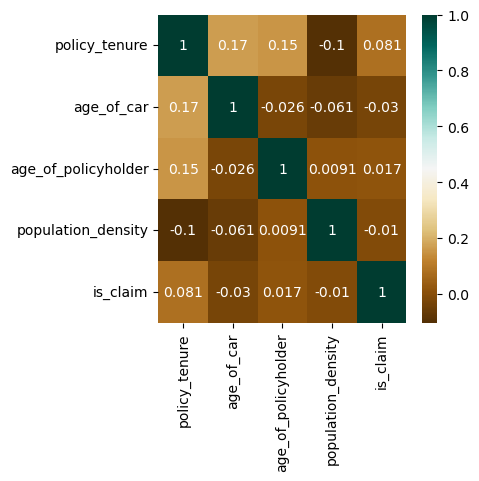

In [4]:
plt.figure(figsize=(4,4))
c=df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

*There is not really any high correlation between the target variable with any of the feature variable.*

In [5]:
#Applying scaling of 'Population Density' variable witout using standard scalar function
def scale(data):
    min_x=min(data)
    max_x=max(data)
    result=[(x-min_x)/(max_x-min_x) for x in data]
    return result

df['population_density']=scale(df['population_density'])

In [6]:
#Encoding the 'model' variable to numercal for without using label encorder
df['model']= df['model'].map({title: i for i, title in enumerate(df['model'].unique())})
print(df['model'].unique())
df.info()

[ 0  1  2  3  4  5  6  7  8  9 10]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   policy_tenure        10000 non-null  float64
 1   age_of_car           10000 non-null  float64
 2   age_of_policyholder  10000 non-null  float64
 3   population_density   10000 non-null  float64
 4   model                10000 non-null  int64  
 5   is_claim             10000 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 468.9 KB


In [7]:
#define the independent and dependent variables
X=df[['policy_tenure','age_of_car','age_of_policyholder','population_density','model']]
Y=df['is_claim']

In [8]:
X=X.values.tolist()
Y=Y.values.tolist()

In [9]:
#split ration 80:20
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=33)

##### Logistics Regression
- Logistic regression, comes under the **supervised ML** approach. 
- The outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False.<br> 
- Instead of giving the exact value as 0 and 1 as output, it gives the probabilistic values which lie between 0 and 1.


In [10]:
def sigmoid(z):
    # Sigmoid function
    return 1 / (1 + 2.71828 ** -z)

def dot_product(X, w):
    # Calculate dot product of X and w
    return sum(x * weight for x, weight in zip(X, w))

In [11]:
def logistic_regression(X,Y, learning_rate=0.01,iterations=1000):
    samples, features = len(X), len(X[0])

    #Initialize weights and bias
    weights=[0] *features
    bias=0

    for _ in range(iterations):
        wt=[0] *features
        bs=0

        for i in range(samples):
            model=dot_product(X[i], weights)+bias
            Y_pred =sigmoid(model)

            # Calculate the gradient
            wt=[wt[j]+(Y_pred -Y[i]) * X[i][j] for j in range(features)]
            bs+=(Y_pred - Y[i])

        # Update parameters using gradient descent
        weights=[weights[j]-learning_rate * wt[j]/samples for j in range(features)]
        bias-=learning_rate*bs/samples

    return weights, bias


In [12]:
#function to predict based on the weights and bias learned
def predict(X, weights, bias):
    Y_pred_class = [1 if sigmoid(dot_product(sample, weights) + bias) >= 0.5 else 0 for sample in X]
    return Y_pred_class


In [13]:
#Train the logistic regression model
weights,bias = logistic_regression(X_train, Y_train)

In [14]:
#Perform predictions on the test set
Y_pred = predict(X_test, weights, bias)

In [15]:
print("Confusion Matrix: ")
print(confusion_matrix(Y_test,Y_pred))
print("Testing Classification Report: ")
print(classification_report(Y_test, Y_pred))

Confusion Matrix: 
[[1882    0]
 [ 118    0]]
Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1882
           1       0.00      0.00      0.00       118

    accuracy                           0.94      2000
   macro avg       0.47      0.50      0.48      2000
weighted avg       0.89      0.94      0.91      2000



#### Similarity based classification Algorithms 
Stores all the available cases and classifies the new data or case based on a similarity measure

**1). Nearest Neighbour Algorithm**<br>
In nearest neighbour algorithm label of most nearest data point is considered

In [16]:
#In order to measure the similarity we use euclidean distance b/w the points 
def euclidean_distance(x1, x2):
    dist=sum((a-b)**2 for a,b in zip(x1, x2))**0.5
    return dist

In [17]:
#nearest neighbour algorithm is implemented 
#k specifies number of neighbours looked to categorize the new data point
def nearest_neighbor(X_train, Y_train, X_test, k):
    predictions = []
    for x in X_test:
        distn= [euclidean_distance(x, xt) for xt in X_train]
        indices = sorted(range(len(distn)), key=lambda i: distn[i])[:k]
        #inspite of using counter class from collections library, we can use the 
        #frequency count for finding the most voted label
        labels = [Y_train[i] for i in indices]
        label_counts = {}
        for label in labels:
            if label in label_counts:
                label_counts[label] += 1
            else:
                label_counts[label] = 1
        most_common_label = max(label_counts, key=label_counts.get)
        predictions.append(most_common_label)
    return predictions

In [18]:
#Calculation of accuracy
def accuracy_score(Y_test, Y_pred):
    true= sum(1 for yt, yp in zip(Y_test,Y_pred) if yt == yp)
    accuracy=true/len(Y_test)
    return accuracy

In [19]:
#the nearest neighbour will consider the most nearest data point, k=1
Y_pred=nearest_neighbor(X_train,Y_train, X_test,1)

In [20]:
print("Accuracy when k=1 is ", accuracy_score(Y_test,Y_pred))

Accuracy when k=1 is  0.883


In [21]:
print("Testing Classification Report: ")
print(classification_report(Y_test, Y_pred))

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1882
           1       0.04      0.04      0.04       118

    accuracy                           0.88      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.89      0.88      0.88      2000



**2). K-Nearest Neighbour Algorithm (KNN)**<br>
In KNN algorithm label of most nearest k (specifoed) data point is considered. A voting based approach is done where the most voted label will become the classification for new data point

In [22]:
#the KNN algorithm will consider the most nearest k data points, here we take K=3
Y_pred=nearest_neighbor(X_train, Y_train, X_test,3)
print("Accuracy when k=3 is ", accuracy_score(Y_test,Y_pred))

Accuracy when k=3 is  0.9295


*As we increased the number of neighbours from 1 to 3, the prediction accuracy improved by 4%*

**3). Weighted K-Nearest Neighbour Algorithm (W-KNN)**<br>
A label score is generated by giving weightage to the distance to k nearest neighbours from the test datapoint

In [23]:
def weighted_knn(X_train, Y_train, X_test, k):
    predictions = []
    for x in X_test:
        distances=[euclidean_distance(x, xt) for xt in X_train]
        indices=sorted(range(len(distances)), key=lambda i: distances[i])[:k]
        labels = [Y_train[i] for i in indices]
        weights =[1 / (d + 1e-8) for d in distances]  # Adding a small value to avoid division by zero: 0.00000001
        label_scores = {}
        for label, weight in zip(labels, weights):
            if label in label_scores:
                label_scores[label] += weight
            else:
                label_scores[label] = weight
        most_common_label = max(label_scores, key=label_scores.get)
        predictions.append(most_common_label)
    return predictions

In [24]:
Y_pred=weighted_knn(X_train, Y_train, X_test,3)
print("Accuracy when k=3 is ", accuracy_score(Y_test,Y_pred))

Accuracy when k=3 is  0.8925


*The weighted KNN approach decresed the prediction accuracy.*

##### **Decision Tree Classification for Prediction**
Decision Trees try to build predictive models using only the most informative features

###### I tried to use the decision tree algorithm in yesterday's task also. But couldn't implement it in such a way where I can pass the X_train, Y_train and X_test values to the model and then predict the Y_test. I am try to create a code incorportating that too

In [38]:
import math #importing math lib for log base 2 calculation

def build_tree(X, Y, max_depth=None, min_samples_split=2, depth=0):
    num_samples = len(X)
    num_features = len(X[0])
    num_labels = len(set(Y))

    if max_depth is not None and depth == max_depth or num_labels == 1 or num_samples < min_samples_split:
        return most_common_label(Y)

    best_feature, best_threshold = find_best_split(X, Y)

    if best_feature is None or best_threshold is None:
        return most_common_label(Y)

    left_indices = [i for i, sample in enumerate(X) if sample[best_feature] < best_threshold]
    right_indices = [i for i, sample in enumerate(X) if sample[best_feature] >= best_threshold]

    left_tree = build_tree([X[i] for i in left_indices], [Y[i] for i in left_indices], max_depth=max_depth if max_depth is None else max_depth-1, min_samples_split=min_samples_split, depth=depth + 1)
    right_tree = build_tree([X[i] for i in right_indices], [Y[i] for i in right_indices], max_depth=max_depth if max_depth is None else max_depth-1, min_samples_split=min_samples_split, depth=depth + 1)

    return (best_feature, best_threshold, left_tree, right_tree)

In [42]:
def find_best_split(X, Y):
    best_gain = 0.0
    best_feature = None
    best_threshold = None

    for feature in range(len(X[0])):
        values = sorted(set([sample[feature] for sample in X]))
        thresholds = [(values[i] + values[i+1]) / 2 for i in range(len(values) - 1)]

        for threshold in thresholds:
            gain = information_gain([sample[feature] for sample in X], Y, threshold)

            if gain > best_gain:
                best_gain = gain
                best_feature = feature
                best_threshold = threshold

    return best_feature, best_threshold

In [43]:
def information_gain(feature_values, Y, threshold):
    left_mask = [value < threshold for value in feature_values]
    right_mask = [not value for value in left_mask]

    left_labels = [Y[i] for i, mask in enumerate(left_mask) if mask]
    right_labels = [Y[i] for i, mask in enumerate(right_mask) if mask]

    gain = entropy(Y) - (len(left_labels) / len(Y)) * entropy(left_labels) - (len(right_labels) / len(Y)) * entropy(right_labels)
    return gain

def entropy(Y):
    label_counts = {}
    for label in Y:
        if label not in label_counts:
            label_counts[label] = 0
        label_counts[label] += 1

    entropy = 0.0
    for count in label_counts.values():
        prob = count / len(Y)
        entropy -= prob * log2(prob)
    return entropy

def log2(x):
    if x == 0:
        return 0
    return math.log(x, 2)

In [44]:
def most_common_label(Y):
    label_counts = {}
    for label in Y:
        if label not in label_counts:
            label_counts[label] = 0
        label_counts[label] += 1

    return max(label_counts, key=label_counts.get)

def predict(X, tree):
    predictions = []
    for sample in X:
        predictions.append(traverse_tree(sample, tree))
    return predictions

def traverse_tree(sample, tree):
    if isinstance(tree, int):
        return tree

    feature, threshold, left_tree, right_tree = tree

    if sample[feature] < threshold:
        return traverse_tree(sample, left_tree)
    else:
        return traverse_tree(sample, right_tree)

In [40]:
model=build_tree(X_train, Y_train)

#Predict on the testing data
Y_pred=predict(X_test,model)

In [41]:
print("Confusion Matrix: ")
print(confusion_matrix(Y_test,Y_pred))
print("Testing Classification Report: ")
print(classification_report(Y_test, Y_pred))

Confusion Matrix: 
[[1733  149]
 [ 108   10]]
Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1882
           1       0.06      0.08      0.07       118

    accuracy                           0.87      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.89      0.87      0.88      2000



*The decision tree is giving 87% accuracy.*